In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import chi2_contingency


# Read dataset
file_path = "Study Case DA (1).xlsx"

In [2]:
# Menampilkan semua kolom tanpa terpotong
pd.set_option('display.max_columns', None)

In [3]:
performance = pd.read_excel(file_path, sheet_name="performance_yearly")

In [4]:
performance

,employee_id,rating,year
0,EMP100000,2.0,2021
1,EMP100001,NaN,2021
2,EMP100002,2.0,2021
3,EMP100003,NaN,2021
4,EMP100004,3.0,2021
...,...,...,...
10045,DUP1942,5.0,2025
10046,DUP2096,3.0,2025
10047,DUP4177,2.0,2025
10048,DUP9801,5.0,2025


In [5]:
performance['year'].value_counts()

year
2021    2010
2022    2010
2023    2010
2024    2010
2025    2010
Name: count, dtype: int64

In [6]:
# Total missing value per kolom
performance.isnull().sum()


employee_id       0
rating         1108
year              0
dtype: int64

In [7]:
tahun = performance['year'].unique()

missing_rating_per_tahun = {}

for i in tahun:
    df_year = performance[performance['year'] == i]
    missing_rating_per_tahun[i] = df_year['rating'].isnull().sum()
missing_rating_per_tahun

{2021: 457, 2022: 151, 2023: 150, 2024: 134, 2025: 216}

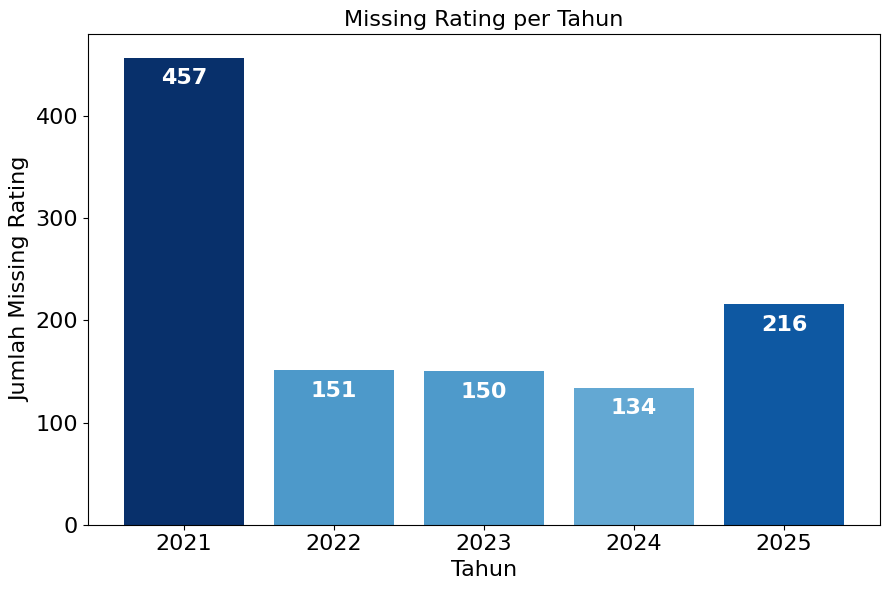

In [8]:
import matplotlib.pyplot as plt

keys = list(missing_rating_per_tahun.keys())
values = list(missing_rating_per_tahun.values())

plt.figure(figsize=(9, 6))
bars = plt.bar(keys, values, color = plt.get_cmap("Blues")(values))

# Title & label fontsize 16
plt.title('Missing Rating per Tahun', fontsize=16)
plt.xlabel('Tahun', fontsize=16)
plt.ylabel('Jumlah Missing Rating', fontsize=16)

# Tick fontsize
plt.xticks(keys, fontsize=16)
plt.yticks(fontsize=16)

# Menampilkan angka putih di atas bar
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height - 30,
        str(height),
        ha='center', va='bottom',
        fontsize=16,
        color='white',
        fontweight='bold'
    )

plt.tight_layout()
plt.show()


In [9]:
performance_dm = performance.dropna(subset=['rating'])

In [10]:
tahun = performance_dm['year'].unique()

missing_rating_per_tahun = {}

for i in tahun:
    df_year = performance_dm[performance_dm['year'] == i]
    missing_rating_per_tahun[i] = df_year['rating'].isnull().sum()
missing_rating_per_tahun

{2021: 0, 2022: 0, 2023: 0, 2024: 0, 2025: 0}

In [11]:
performance_dm['year'].value_counts()

year
2024    1876
2023    1860
2022    1859
2025    1794
2021    1553
Name: count, dtype: int64

In [12]:
before = performance['year'].value_counts().sort_index()
after = performance_dm['year'].value_counts().sort_index()

# pastikan indexnya sama (tahun 2021-2025)
before, after


(year
 2021    2010
 2022    2010
 2023    2010
 2024    2010
 2025    2010
 Name: count, dtype: int64,
 year
 2021    1553
 2022    1859
 2023    1860
 2024    1876
 2025    1794
 Name: count, dtype: int64)

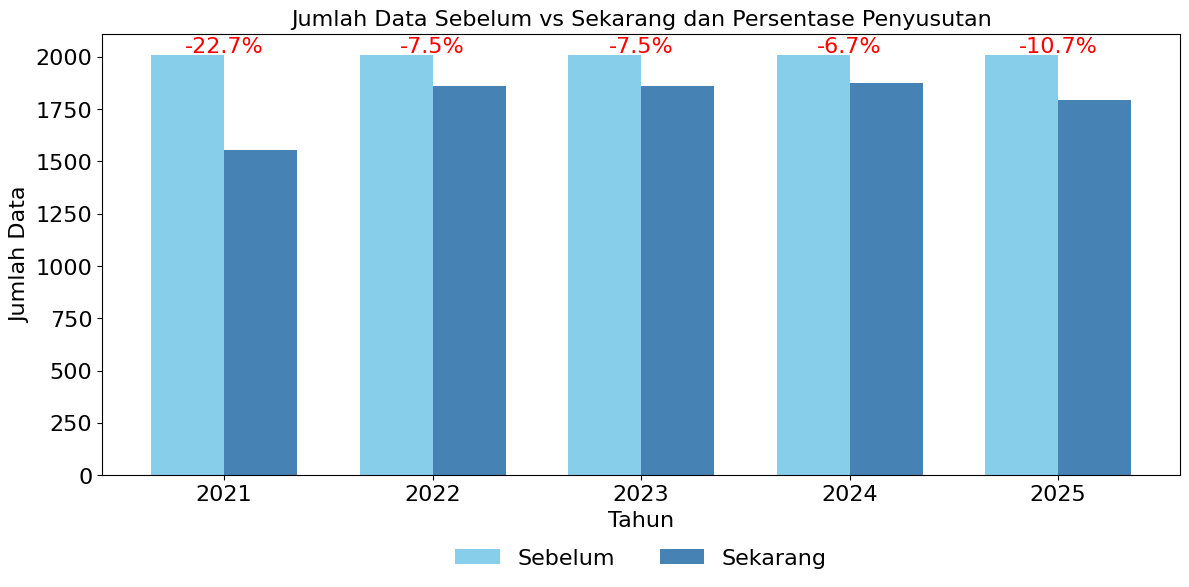

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Hitung jumlah data sebelum & sesudah
before = performance['year'].value_counts().sort_index()
after = performance_dm['year'].value_counts().sort_index()

years = list(before.index)

# Hitung penyusutan
shrink = before.values - after.values
shrink_percent = (shrink / before.values) * 100

# Posisi bar
x = np.arange(len(years))
width = 0.35

plt.figure(figsize=(12, 6))

# Bar chart sebelum & sesudah
bars1 = plt.bar(x - width/2, before.values, width, label="Sebelum", color="skyblue")
bars2 = plt.bar(x + width/2, after.values, width, label="Sekarang", color="steelblue")

# Judul & label
plt.title("Jumlah Data Sebelum vs Sekarang dan Persentase Penyusutan", fontsize=16)
plt.xlabel("Tahun", fontsize=16)
plt.ylabel("Jumlah Data", fontsize=16)
plt.xticks(x, years, fontsize=16)
plt.yticks(fontsize=16)

# Legend di bawah
plt.legend(
    fontsize=16,
    loc='upper center',
    bbox_to_anchor=(0.5, -0.12),
    ncol=2,
    frameon=False
)

# Tampilkan persentase penyusutan di atas bar
for i in range(len(years)):
    max_height = max(before.values[i], after.values[i])
    plt.text(
        x[i],
        max_height + 10,
        f"-{shrink_percent[i]:.1f}%",
        ha="center",
        fontsize=16,
        color="red"
    )

plt.tight_layout()
plt.show()


In [14]:
performance_dm['rating'].value_counts()

rating
3.0     3339
4.0     2437
2.0     1578
5.0      881
1.0      672
0.0       15
6.0       13
99.0       7
Name: count, dtype: int64

In [15]:
# Rating valid hanya 1 sampai 5
valid_values = [1, 2, 3, 4, 5]

# Filter rating invalid
invalid_rating_df = performance_dm[~performance_dm['rating'].isin(valid_values)]

# Tampilkan semua nilai rating invalid yang muncul
print("🔍 Nilai rating invalid yang ditemukan:")
print(invalid_rating_df['rating'].unique())
print()

# Hitung jumlah nilai invalid per tahun
print("🔍 Jumlah rating invalid per tahun:")
invalid_counts = invalid_rating_df.groupby('year')['rating'].value_counts()
print(invalid_counts)


🔍 Nilai rating invalid yang ditemukan:
[ 0. 99.  6.]

🔍 Jumlah rating invalid per tahun:
year  rating
2021  0.0       3
      99.0      2
      6.0       1
2022  6.0       5
      0.0       2
      99.0      2
2023  0.0       4
      6.0       3
      99.0      1
2024  0.0       4
      6.0       2
      99.0      2
2025  0.0       2
      6.0       2
Name: count, dtype: int64


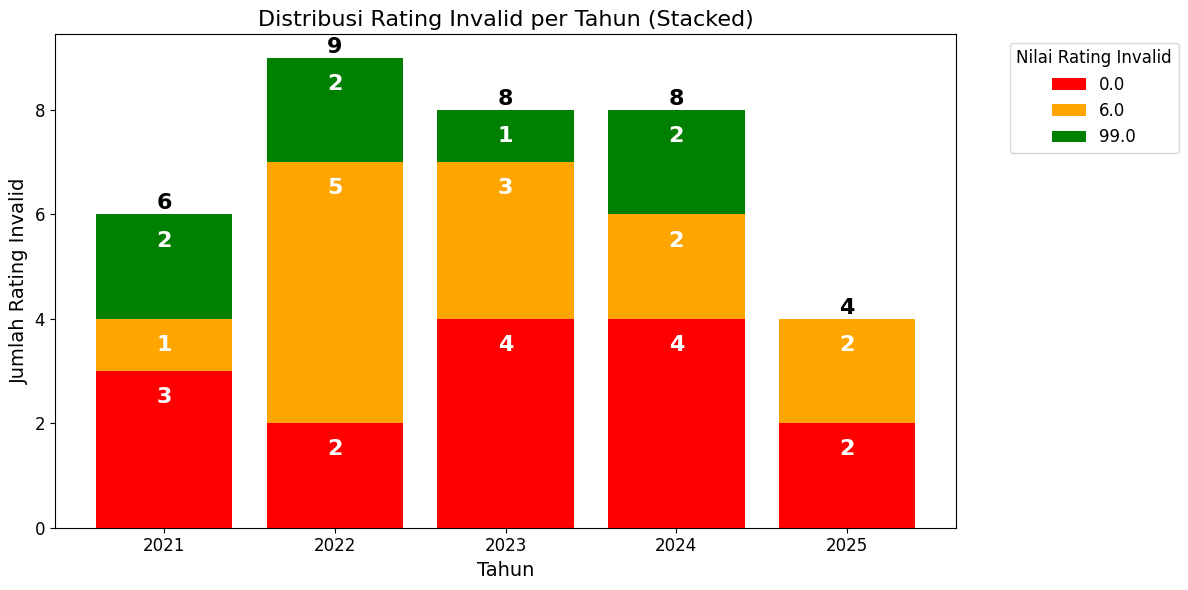

In [35]:
import matplotlib.pyplot as plt

# Rating valid
valid_values = [1, 2, 3, 4, 5]

# Filter rating invalid
invalid_rating_df = performance_dm[~performance_dm['rating'].isin(valid_values)]

# Hitung jumlah invalid per tahun per nilai
invalid_pivot = invalid_rating_df.groupby(['year', 'rating']).size().unstack(fill_value=0)

# Urutkan index tahun
invalid_pivot = invalid_pivot.sort_index()

# Tentukan warna untuk setiap nilai invalid
unique_invalid = invalid_pivot.columns.tolist()

color_map = {}
for r in unique_invalid:
    if r == 99:
        color_map[r] = "green"
    elif r == 0:
        color_map[r] = "red"
    elif r == 6:
        color_map[r] = "orange"
    else:
        color_map[r] = None  # biarkan matplotlib pilih

# Plot stacked bar
plt.figure(figsize=(12, 6))
bottom = [0] * len(invalid_pivot)

for rating in unique_invalid:
    values = invalid_pivot[rating].values

    bars = plt.bar(
        invalid_pivot.index,
        values,
        bottom=bottom,
        label=str(rating),
        color=color_map[rating]
    )

    # Tambahkan label per stack (di dalam bar, warna putih bold)
    for bar, value, btm in zip(bars, values, bottom):
        if value > 0:  # hanya tampil jika ada nilai
            plt.text(
                bar.get_x() + bar.get_width()/2,
                btm+ value-0.5,
                str(int(value)),
                ha="center",
                va="center",
                color="white",
                fontsize=16,
                fontweight="bold"
            )

    bottom = [i + j for i, j in zip(bottom, values)]

# Tambahkan total di atas bar
totals = invalid_pivot.sum(axis=1)
for i, (year, total) in enumerate(totals.items()):
    plt.text(
        year,
        total + 0.1,
        str(int(total)),
        ha="center",
        fontsize=16,
        fontweight="bold"
    )

plt.title("Distribusi Rating Invalid per Tahun (Stacked)", fontsize=16)
plt.xlabel("Tahun", fontsize=14)
plt.ylabel("Jumlah Rating Invalid", fontsize=14)
plt.xticks(invalid_pivot.index, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title="Nilai Rating Invalid", fontsize=12, title_fontsize=12, bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


In [36]:
valid_values = [1, 2, 3, 4, 5]

performance_dm_clean = performance_dm[performance_dm['rating'].isin(valid_values)].copy()


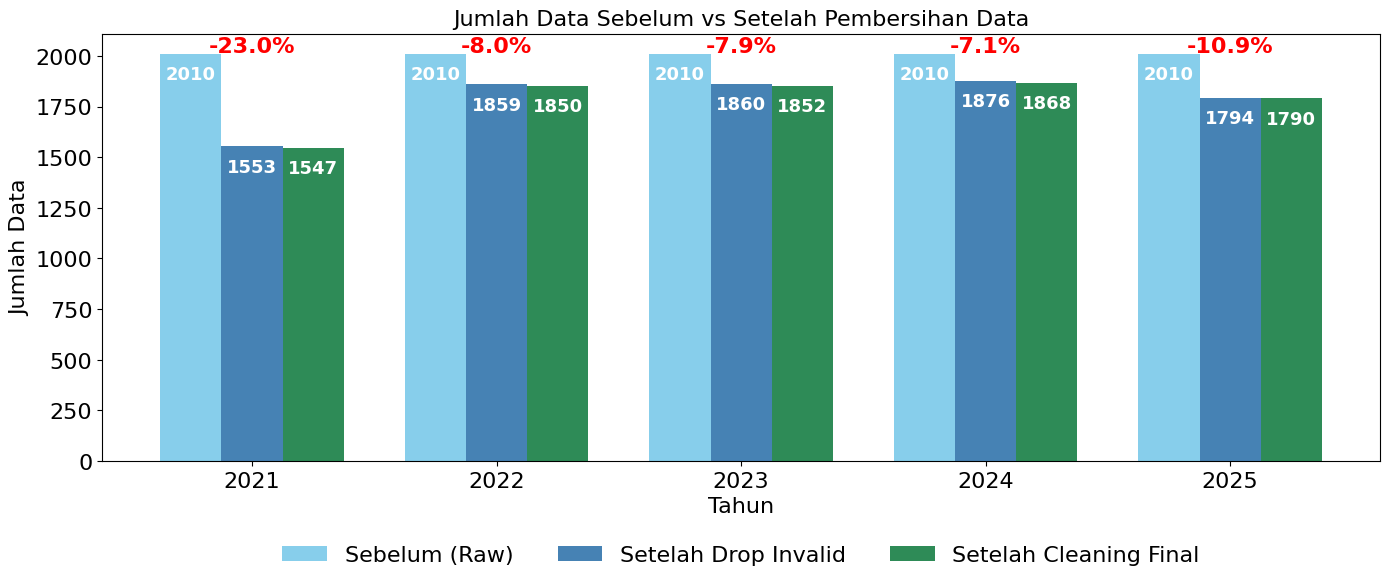

In [55]:
import matplotlib.pyplot as plt
import numpy as np

# Hitung jumlah data per tahun
before = performance['year'].value_counts().sort_index()
after_drop_invalid = performance_dm['year'].value_counts().sort_index()
after_clean = performance_dm_clean['year'].value_counts().sort_index()

years = list(before.index)

# Pastikan alignment index
after_drop_invalid = after_drop_invalid.reindex(years, fill_value=0)
after_clean = after_clean.reindex(years, fill_value=0)

# Hitung penyusutan total Raw → Clean
shrink = before.values - after_clean.values
shrink_percent = (shrink / before.values) * 100

# Posisi bar
x = np.arange(len(years))
width = 0.25

plt.figure(figsize=(14, 6))

# Plot bar
bars1 = plt.bar(x - width, before.values, width, label="Sebelum (Raw)", color="#87CEEB")
bars2 = plt.bar(x, after_drop_invalid.values, width, label="Setelah Drop Invalid", color="#4682B4")
bars3 = plt.bar(x + width, after_clean.values, width, label="Setelah Cleaning Final", color="#2E8B57")


# ---- Tambahkan angka di dalam masing-masing bar ----
def add_inner_labels(bars):
    for bar in bars:
        height = bar.get_height()
        if height > 0:  # hanya tampil jika ada nilai
            plt.text(
                bar.get_x() + bar.get_width() / 2,
                height - 100,                   # posisi tengah bar
                f"{int(height)}",
                ha="center",
                va="center",
                color="white",
                fontsize=13,
                fontweight="bold"
            )

add_inner_labels(bars1)
add_inner_labels(bars2)
add_inner_labels(bars3)


# ---- Tambahkan persentase penyusutan Raw → Clean di atas ketiga bar ----
for i in range(len(years)):
    max_height = max(before.values[i], after_drop_invalid.values[i], after_clean.values[i])
    plt.text(
        x[i],
        max_height + 10,
        f"-{shrink_percent[i]:.1f}%",
        ha="center",
        fontsize=16,
        color="red",
        fontweight="bold"
    )

# Title & labels
plt.title("Jumlah Data Sebelum vs Setelah Pembersihan Data", fontsize=16)
plt.xlabel("Tahun", fontsize=16)
plt.ylabel("Jumlah Data", fontsize=16)
plt.xticks(x, years, fontsize=16)
plt.yticks(fontsize=16)

# Legend di bawah
plt.legend(
    fontsize=16,
    loc='upper center',
    bbox_to_anchor=(0.5, -0.15),
    ncol=3,
    frameon=False
)

plt.tight_layout()
plt.show()


In [56]:
tahun = performance_dm_clean['year'].unique()

for i in tahun:
    globals()[f"performance_{i}"] = performance_dm_clean[performance_dm_clean['year'] == i]

In [57]:
display(performance_2021.head())
display(performance_2022.head())
display(performance_2023.head())
display(performance_2024.head())

,employee_id,rating,year
0,EMP100000,2.0,2021
2,EMP100002,2.0,2021
4,EMP100004,3.0,2021
6,EMP100006,4.0,2021
7,EMP100007,4.0,2021


,employee_id,rating,year
2010,EMP100000,3.0,2022
2011,EMP100001,3.0,2022
2012,EMP100002,3.0,2022
2013,EMP100003,4.0,2022
2014,EMP100004,3.0,2022


,employee_id,rating,year
4020,EMP100000,1.0,2023
4021,EMP100001,4.0,2023
4022,EMP100002,3.0,2023
4023,EMP100003,2.0,2023
4024,EMP100004,4.0,2023


,employee_id,rating,year
6030,EMP100000,3.0,2024
6031,EMP100001,4.0,2024
6033,EMP100003,1.0,2024
6034,EMP100004,2.0,2024
6035,EMP100005,3.0,2024


In [65]:
before_counts = performance['rating'].value_counts(normalize=True)
after_counts  = performance_dm_clean['rating'].value_counts(normalize=True)

bias_ratio_rating5 = after_counts.get(5, 0) / before_counts.get(5, 0)
display(bias_ratio_rating5)

from scipy.stats import ks_2samp

ks_result = ks_2samp(
    performance['rating'].dropna(),
    performance_dm_clean['rating']
)

display(ks_result)

before_freq = performance['rating'].value_counts().sort_index()
after_freq  = performance_dm_clean['rating'].value_counts().sort_index()

# Align index so missing categories are treated as 0
combined_index = sorted(set(before_freq.index).union(after_freq.index))
before_aligned = before_freq.reindex(combined_index, fill_value=0)
after_aligned  = after_freq.reindex(combined_index, fill_value=0)

contingency = [before_aligned.values, after_aligned.values]
chi2, p, dof, _ = chi2_contingency(contingency)

print("===== 3) Chi-square Test on Rating Proportions =====")
print("Chi-square :", chi2)
print("p-value    :", p)
print("\nContingency Table:")
display(pd.DataFrame({'Before': before_aligned, 'After': after_aligned}))

1.0039294936566745

KstestResult(statistic=0.002236636099306643, pvalue=0.9999999999999968, statistic_location=5.0, statistic_sign=-1)

===== 3) Chi-square Test on Rating Proportions =====
Chi-square : 34.93150301945874
p-value    : 1.1520861774124061e-05

Contingency Table:


,Before,After
rating,,
0.0,15,0
1.0,672,672
2.0,1578,1578
3.0,3339,3339
4.0,2437,2437
5.0,881,881
6.0,13,0
99.0,7,0


🎯 Kesimpulan keseluruhan:

✔ Pembersihan data tidak mengubah pola distribusi rating (tidak bias secara bentuk distribusi).
⚠ Tetapi ada dampak besar pada nilai rata-rata, terutama karena tahun 2021 kehilangan banyak data.
➡ Maka, data setelah cleaning boleh digunakan, namun semua analisis sebaiknya disertai catatan metodologi bahwa:

Data 2021 mengalami pengurangan signifikan dan dapat mempengaruhi interpretasi hasil.

In [63]:
# ============================================
# Bias Validation Script for Rating Cleaning
# ============================================

import pandas as pd
import numpy as np
from scipy.stats import ks_2samp, chi2_contingency

# --- 1) Proportion Bias Ratio (fokus rating 5) ---
def proportion_bias_ratio(before, after, rating_value=5):
    before_counts = before.value_counts(normalize=True)
    after_counts  = after.value_counts(normalize=True)

    return after_counts.get(rating_value, 0) / before_counts.get(rating_value, 0)


# --- 2) Chi-square Test for distribution 1–5 ---
def chi_square_rating_test(before, after):
    before_tab = before.value_counts().sort_index()
    after_tab  = after.value_counts().sort_index()

    # Align index
    idx = sorted(set(before_tab.index.tolist() + after_tab.index.tolist()))
    before_tab = before_tab.reindex(idx, fill_value=0)
    after_tab  = after_tab.reindex(idx, fill_value=0)

    contingency = pd.DataFrame({'Before': before_tab, 'After': after_tab})
    chi2, p, dof, expected = chi2_contingency(contingency.T)

    return chi2, p, contingency


# --- 3) KS Test for full distribution ---
def ks_test_distribution(before, after):
    # Hanya ambil nilai numerik non-NaN
    b = before.dropna()
    a = after.dropna()
    return ks_2samp(b, a)


# --- 4) Ringkasan akhir bias check ---
def validate_bias(before_series, after_series, rating_col_name="rating"):

    print("\n=====  Bias Validation Summary  =====")

    # KS Test
    ks = ks_test_distribution(before_series, after_series)
    print("\n[1] Kolmogorov–Smirnov Test (Distribusi)")
    print(f" KS Statistic : {ks.statistic:.6f}")
    print(f" p-value      : {ks.pvalue:.6f}")
    if ks.pvalue > 0.05:
        print(" 📌 Distribusi TIDAK berubah signifikan (GOOD)")
    else:
        print(" ⚠ Distribusi BERUBAH signifikan (POTENSI BIAS)")

    # Chi-square Test
    chi2, p_chi, contingency = chi_square_rating_test(before_series, after_series)
    print("\n[2] Chi-square Test (Proporsi Kategori Rating)")
    print(f" Chi-square : {chi2:.6f}")
    print(f" p-value    : {p_chi:.6f}")
    print(" Contingency Table:")
    print(contingency)
    if p_chi > 0.05:
        print(" 📌 Proporsi kategori TIDAK berbeda signifikan (GOOD)")
    else:
        print(" ⚠ Proporsi kategori BERBEDA signifikan (POTENSI BIAS)")

    # Bias Ratio (specific to rating 5)
    bias_ratio = proportion_bias_ratio(before_series, after_series, 5)
    print("\n[3] Proportion Bias Ratio (Rating 5)")
    print(f" Bias Ratio Rating 5: {bias_ratio:.4f}")
    if 0.90 <= bias_ratio <= 1.10:
        print(" 📌 Rating 5 relatif stabil (<10% perubahan) (GOOD)")
    else:
        print(" ⚠ Rating 5 berubah lebih dari 10% (POTENSI BIAS)")

    print("\n=====  Interpretation Guide  =====")
    print("✔ Ideal: KS p-value > 0.05, Chi-square p-value > 0.05, Bias Ratio ~ 1.0")
    print("⚠ Jika salah satu signifikan, cek kembali metode cleaning/imputation.")

    return {
        "ks_pvalue": ks.pvalue,
        "chi_square_pvalue": p_chi,
        "bias_ratio_rating5": bias_ratio,
        "contingency": contingency
    }


# ======== RUN CHECK ========

result = validate_bias(
    performance['rating'],              # sebelum cleaning
    performance_dm_clean['rating'],     # sesudah cleaning
    rating_col_name="rating"
)



=====  Bias Validation Summary  =====

[1] Kolmogorov–Smirnov Test (Distribusi)
 KS Statistic : 0.002237
 p-value      : 1.000000
 📌 Distribusi TIDAK berubah signifikan (GOOD)

[2] Chi-square Test (Proporsi Kategori Rating)
 Chi-square : 34.931503
 p-value    : 0.000012
 Contingency Table:
        Before  After
rating               
0.0         15      0
1.0        672    672
2.0       1578   1578
3.0       3339   3339
4.0       2437   2437
5.0        881    881
6.0         13      0
99.0         7      0
 ⚠ Proporsi kategori BERBEDA signifikan (POTENSI BIAS)

[3] Proportion Bias Ratio (Rating 5)
 Bias Ratio Rating 5: 1.0039
 📌 Rating 5 relatif stabil (<10% perubahan) (GOOD)

=====  Interpretation Guide  =====
✔ Ideal: KS p-value > 0.05, Chi-square p-value > 0.05, Bias Ratio ~ 1.0
⚠ Jika salah satu signifikan, cek kembali metode cleaning/imputation.
